<a href="https://colab.research.google.com/github/raysky9999/preScreen/blob/main/PreScreen2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns
import datetime
from google.colab import drive
drive.mount('/content/drive')
path = 'drive/MyDrive/Colab Notebooks/'#change path accordingly to where you store the input file

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
df = pd.read_csv(path + 'palm_ffb.csv')
df

,Date,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
0,01.01.2008,616.4,25.306452,21.3,32.2,184.4,25,777778.3951,1.62
1,01.02.2008,568.9,26.165517,20.9,35.1,140.2,23,767988.2759,1.45
2,01.03.2008,577.6,25.448387,21.3,32.9,280.4,25,783951.9231,1.56
3,01.04.2008,581.1,26.903333,20.6,34.8,173.3,25,788987.0504,1.39
4,01.05.2008,545.4,27.241935,20.9,35.0,140.6,25,813659.7222,1.44
...,...,...,...,...,...,...,...,...,...
125,01.06.2018,498.2,27.213333,21.6,33.6,165.6,24,820758.9147,1.29
126,01.07.2018,494.7,27.074194,21.2,33.5,154.7,26,882254.2254,1.42
127,01.08.2018,478.8,27.016129,20.4,33.6,127.2,25,829488.8199,1.61
128,01.09.2018,481.1,26.946667,21.0,34.2,180.6,23,792101.0471,1.91


In [3]:
#encoding date into values
df['DateFormatted'] = df['Date'].apply(lambda date: datetime.datetime.strptime(date,"%d.%m.%Y"))
df['Year'] = df['DateFormatted'].apply(lambda time: time.year)

df['Month'] = df['DateFormatted'].apply(lambda time: time.month)
df=df.drop(columns=['Date','DateFormatted'])
#df['Day'] = df['DateFormatted'].apply(lambda time: time.day) not needed since all is on 1st day of month

In [4]:
df.describe()


,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield,Year,Month
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,527.646923,26.849918,21.379231,33.851538,188.980769,24.753846,793404.491565,1.602231,2012.923077,6.423077
std,57.367844,0.651413,0.688971,1.079638,80.237210,1.239289,34440.893854,0.281751,3.136718,3.434583
min,380.700000,25.158065,18.900000,31.100000,2.000000,21.000000,683431.944400,1.080000,2008.000000,1.000000
25%,488.625000,26.442285,21.000000,33.100000,140.300000,24.000000,768966.949100,1.390000,2010.000000,3.250000
50%,538.300000,26.930645,21.500000,33.900000,182.150000,25.000000,790036.158050,1.585000,2013.000000,6.000000
75%,571.025000,27.270726,21.800000,34.600000,226.100000,26.000000,821989.235250,1.807500,2016.000000,9.000000
max,647.300000,28.580000,22.600000,36.000000,496.100000,27.000000,882254.225400,2.270000,2018.000000,12.000000


In [5]:
dfOri = df.copy()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SoilMoisture   130 non-null    float64
 1   Average_Temp   130 non-null    float64
 2   Min_Temp       130 non-null    float64
 3   Max_Temp       130 non-null    float64
 4   Precipitation  130 non-null    float64
 5   Working_days   130 non-null    int64  
 6   HA_Harvested   130 non-null    float64
 7   FFB_Yield      130 non-null    float64
 8   Year           130 non-null    int64  
 9   Month          130 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 10.3 KB


array([[<Axes: title={'center': 'SoilMoisture'}>,
        <Axes: title={'center': 'Average_Temp'}>,
        <Axes: title={'center': 'Min_Temp'}>],
       [<Axes: title={'center': 'Max_Temp'}>,
        <Axes: title={'center': 'Precipitation'}>,
        <Axes: title={'center': 'Working_days'}>],
       [<Axes: title={'center': 'HA_Harvested'}>,
        <Axes: title={'center': 'FFB_Yield'}>,
        <Axes: title={'center': 'Year'}>],
       [<Axes: title={'center': 'Month'}>, <Axes: >, <Axes: >]],
      dtype=object)

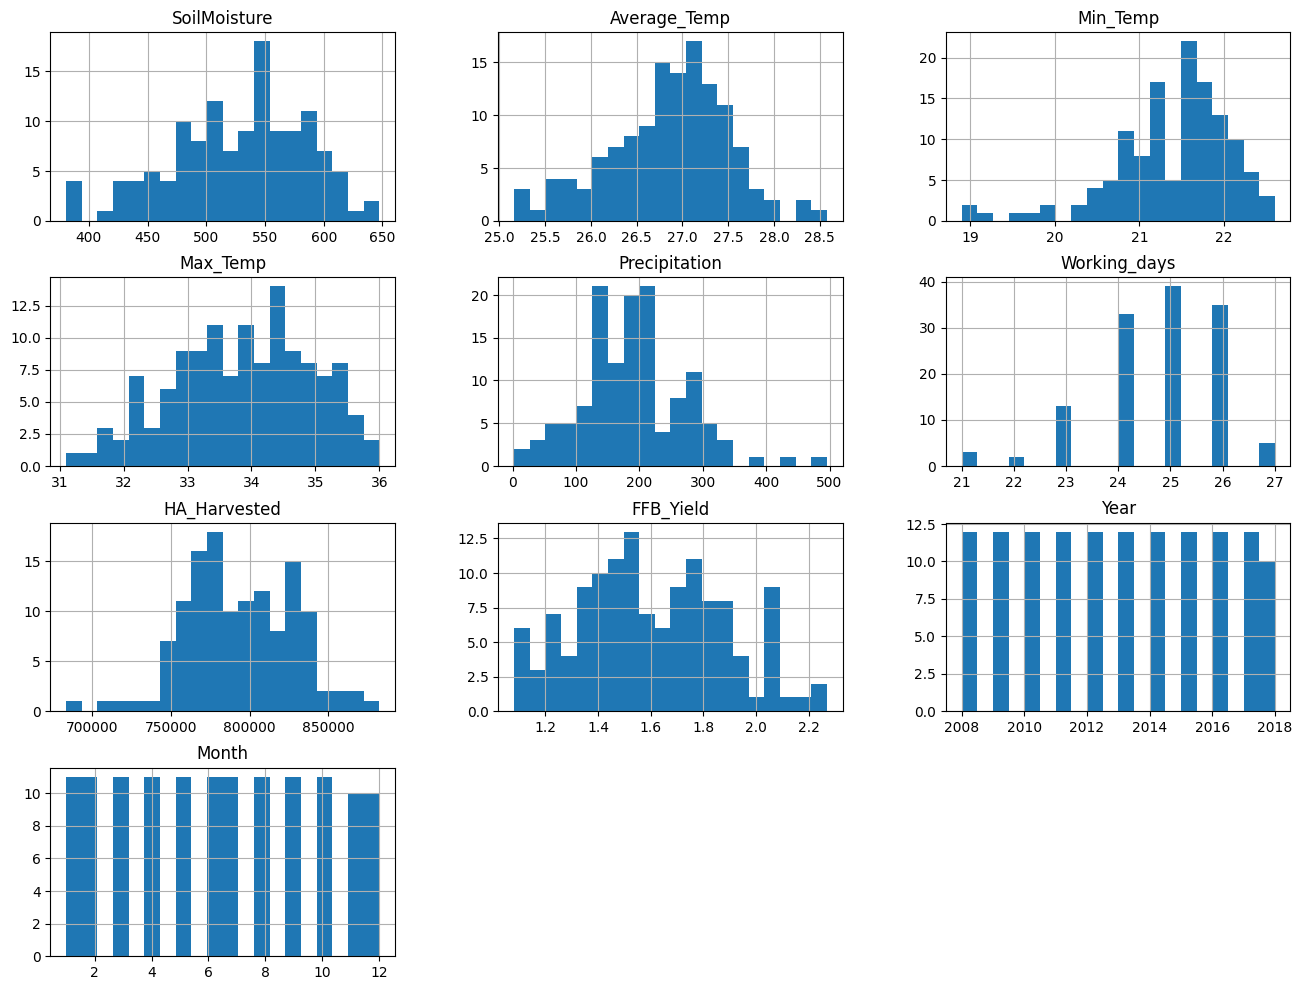

In [7]:
df.hist(bins=20,figsize=(16,12))

Correlation between features



<Axes: >

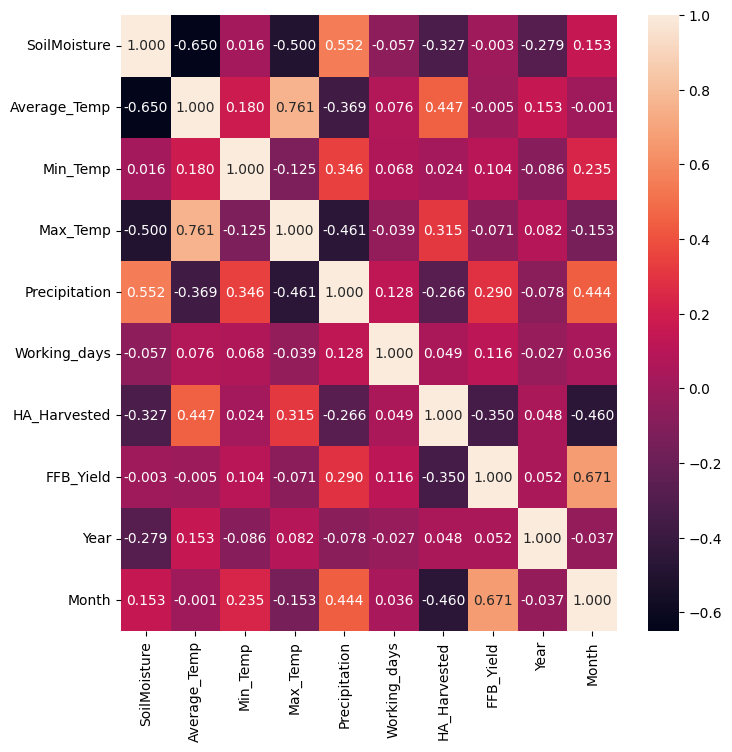

In [8]:
print("Correlation between features\n")
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(df.corr(),annot=True,fmt='.3f')

In [9]:
df = df.drop(columns=['Max_Temp','SoilMoisture'])
#dropping Max_Temp since it correlates to Average_Temp and Average_Temp seems to have higher correlation to FFB_Yield, similarly removing SoilMoisture that correlates to Precipitation

Correlation between features



<Axes: >

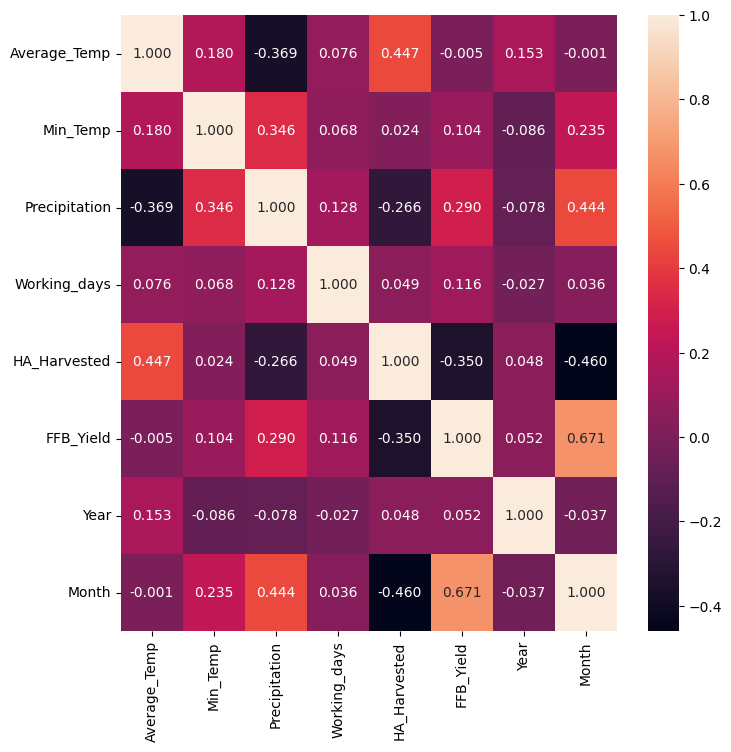

In [10]:
print("Correlation between features\n")
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(df.corr(),annot=True,fmt='.3f')

Correlation between features



<Axes: >

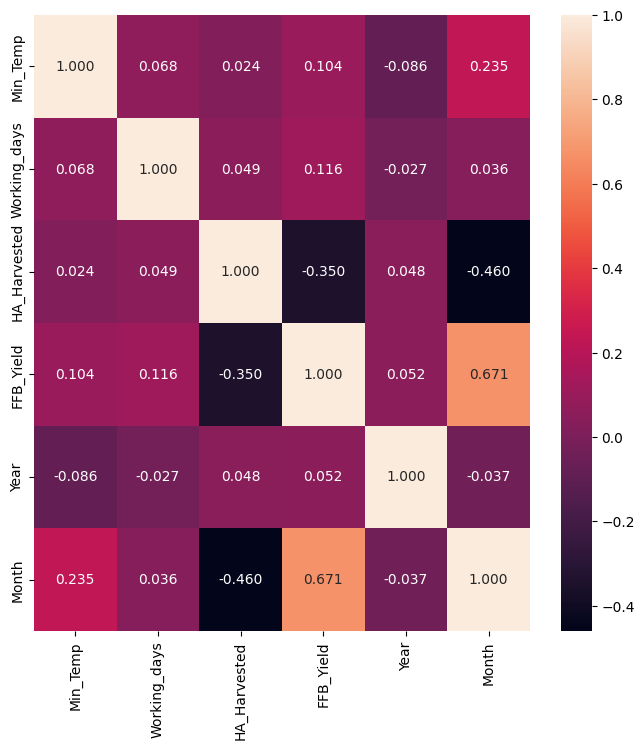

In [11]:
df = df.drop(columns=['Precipitation','Average_Temp'])
print("Correlation between features\n")
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(df.corr(),annot=True,fmt='.3f')

In [12]:
train, test = train_test_split(df, test_size=0.15,random_state=0)
X_train=train.drop(columns=['FFB_Yield'])
y_train=train['FFB_Yield']
X_test=test.drop(columns=['FFB_Yield'])
y_test=test['FFB_Yield']
reg = LinearRegression().fit(X_train, y_train)
r2=reg.score(X_train, y_train)
print(r2)
y_pred = reg.predict(X_test)
r2_test=r2_score(y_test, y_pred)
print(r2_test)

0.433238779381351
0.664268870887472


building a multivariate linear regression doesn't seem to promise good r square result despite removing multi-colinearity

In [13]:
train, test = train_test_split(dfOri, test_size=0.15,random_state=0)
X_train=train[['HA_Harvested','Month']]
y_train=train['FFB_Yield']
X_test=test[['HA_Harvested','Month']]
y_test=test['FFB_Yield']
reg = LinearRegression().fit(X_train, y_train)
r2=reg.score(X_train, y_train)
print(r2)
y_pred = reg.predict(X_test)
r2_test=r2_score(y_test, y_pred)
print(r2_test)

0.4151683728119556
0.658814907739546


revert to use dfOri and choose only the 2 most significant drivers to test
it seems result is still not promising


In [14]:
#try with random forest performance seems random
from sklearn.ensemble import RandomForestRegressor
train, test = train_test_split(dfOri, test_size=0.15,random_state=0)
X_train=train.drop(columns=['FFB_Yield'])
y_train=train['FFB_Yield']
X_test=test.drop(columns=['FFB_Yield'])
y_test=test['FFB_Yield']
regr = RandomForestRegressor(max_depth=6, n_estimators=100, random_state=0)
rf = regr.fit(X_train, y_train)
y_pred = rf.predict(X_test)
r2_test=r2_score(y_test, y_pred)
print(r2_test)

0.6939205367410894


         Feature  Importance
0          Month    0.547474
1   HA_Harvested    0.102060
2   Average_Temp    0.074176
3  Precipitation    0.068154
4           Year    0.068118
5   SoilMoisture    0.050060
6       Max_Temp    0.042010
7       Min_Temp    0.027686
8   Working_days    0.020262


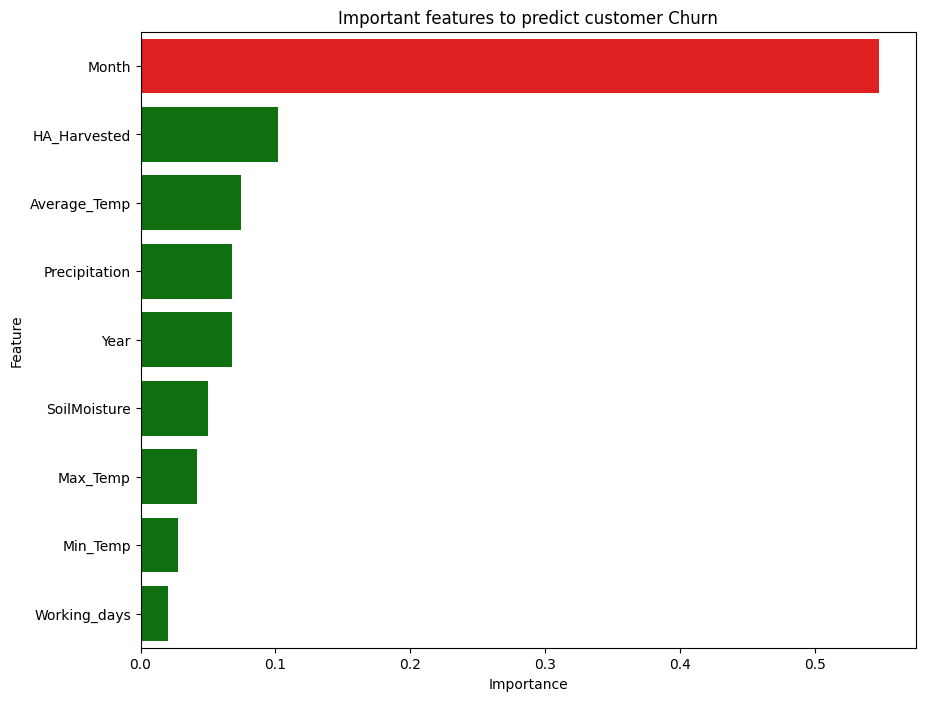

In [15]:
def feature_importances(model, X_train, n=5):
    feat_dict= {}
    for col, val in sorted(zip(X_train.columns, model.feature_importances_),key=lambda x:x[1],reverse=True):
        feat_dict[col]=val
    feat_df = pd.DataFrame({'Feature':feat_dict.keys(),'Importance':feat_dict.values()})
    print(feat_df.head(n))
    values = feat_df.Importance.head(n)
    idx = feat_df.Feature.head(n)
    plt.figure(figsize=(10,8))
    clrs = ['green' if (x < max(values)) else 'red' for x in values ]
    sns.barplot(y=idx,x=values,palette=clrs).set(title='Important features to predict customer Churn')
    plt.show()
feature_importances(rf, X_train, n=10)